In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PropertyMol import PropertyMol
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
import pickle
import sys
from pathlib import Path

In [2]:
sys.path.append('/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/kinase_focused_fragment_library/analysis/ligand_analysis')
sys.path.append('/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/kinase_focused_fragment_library/recombination')
from construct_ligand import construct_ligand, read_fragment_library
from novelty import read_scaffolds

In [3]:
def pickle_loader(pickle_file):

    try:
        while True:
            yield pickle.load(pickle_file)
    except EOFError:
        pass

In [4]:
combinatorial_library_folder = Path('/home/paula/Masterarbeit/CombinatorialLibrary/')
file_name = combinatorial_library_folder / 'combinatorial_library.pickle'

In [5]:
# with open(file_name, 'rb') as pickle_file:
#     ligands = []
#     for ligand in pickle_loader(pickle_file):
#         ligands.append(ligand)

In [6]:
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']
data = read_fragment_library(Path('/home/paula/Masterarbeit/FragmentLibrary'), subpockets)

Number of fragments in AP : 2559
Number of fragments in FP : 1865
Number of fragments in SE : 1560
Number of fragments in GA : 1023
Number of fragments in B1 : 98
Number of fragments in B2 : 92


In [7]:
count_original = 0
count_original_sub = 0
chembl_match = 0
with open(file_name, 'rb') as pickle_file:
    
    for i, ligand in enumerate(pickle_loader(pickle_file)):
    
        count_original += ligand.original
        count_original_sub += ligand.original_sub
        chembl_match += ligand.chembl_match

In [8]:
count_original, count_original_sub, chembl_match

(3, 10, 4)

In [9]:
# chembl matches
chembl_ligands = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        #if ligand.mwt == 0 and ligand.lipinski == 0:
        if ligand.chembl_match == 1:
            count += 1
            print(count, i+1)
            chembl_ligands.append(ligand)

1 242
2 322
3 619
4 620


In [10]:
chembl_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(construct_ligand(ligand.meta, data)[0])) for ligand in chembl_ligands]

In [11]:
[(i, Chem.MolToSmiles(mol))for i, mol in enumerate(chembl_mols)]

[(0, 'CCOc1ccccc1Oc1nc(Nc2ccc(N3CC[NH2+]CC3)cc2)ncc1C(=O)Nc1c(C)cccc1C'),
 (1, 'NC1=NC(=C2CCNC(=O)c3[nH]ccc32)C(=O)N1'),
 (2, 'CCOc1ccccc1Oc1nc(Nc2ccc(N3CC[NH2+]CC3)cc2)ncc1C(=O)Nc1c(C)cccc1C'),
 (3, 'Cc1cc(Nc2cc(N3CC[NH+](C)CC3)nc(Sc3ccc(NC(=O)C4CC4)cc3)n2)[nH]n1')]

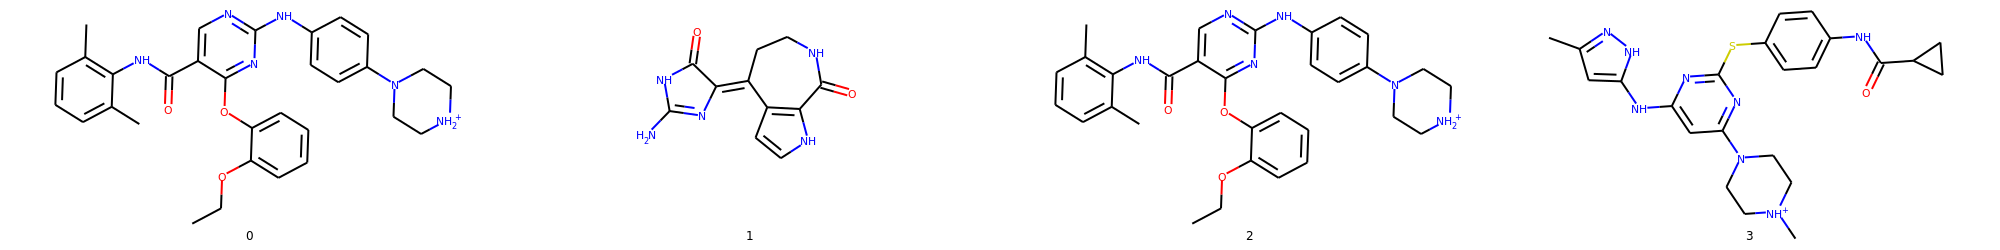

In [12]:
Draw.MolsToGridImage(chembl_mols, molsPerRow=4, maxMols=150, subImgSize=(500, 250), legends=[str(i) for i in range(138)])

In [13]:
# klifs matches
original_ligands = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        if ligand.original == 1:
            count += 1
            print(count, i+1)
            original_ligands.append(ligand)

1 302
2 322
3 620


In [14]:
original_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(construct_ligand(ligand.meta, data)[0])) for ligand in original_ligands]

In [15]:
original_legend = [str(construct_ligand(ligand.meta, data)[1]) for ligand in original_ligands]

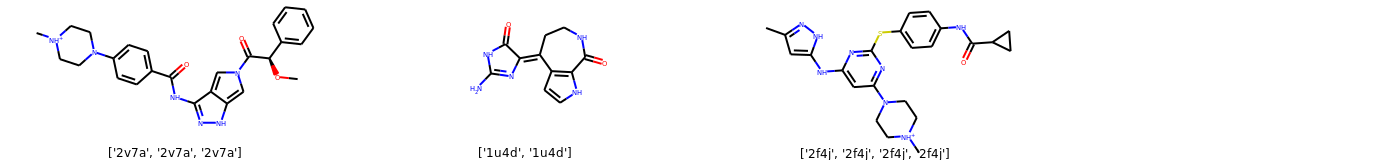

In [16]:
Draw.MolsToGridImage(original_mols, molsPerRow=4, maxMols=150, subImgSize=(350, 160), legends=original_legend)

In [17]:
# novel ligand fulfilling all conditions
lst = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        if ligand.original == 0 and ligand.original_sub == 0 and ligand.chembl_match == 0 and ligand.lipinski == 1 and \
            ligand.hbd == 1 and ligand.hba == 1 and ligand.mwt == 1 and ligand.logp == 1:
            lst.append(i+1)

In [18]:
# select a certain ligand
with open(file_name, 'rb') as pickle_file:
    
    #612 (not drug like)
    for i in range(lst[100]):
        ligand = next(pickle_loader(pickle_file))

In [19]:
mol = construct_ligand(ligand.meta, data)[0]

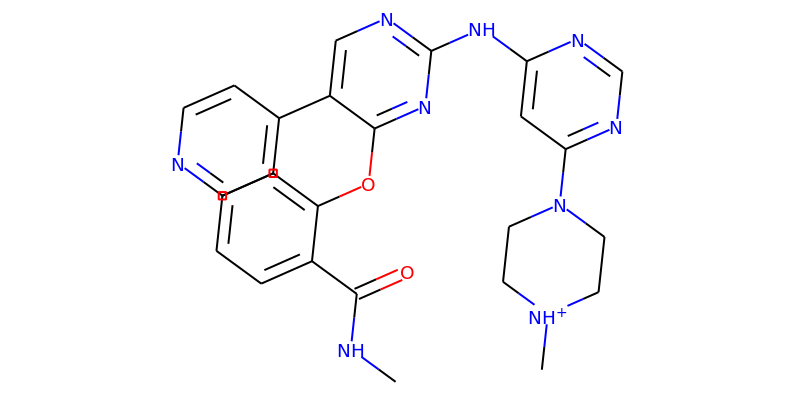

In [20]:
AllChem.Compute2DCoords(mol)
# Draw.MolsToGridImage([mol], subImgSize=(400, 250), molsPerRow=1)
Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(mol))], subImgSize=(800, 400), molsPerRow=1)

In [21]:
ligand.original, ligand.original_sub, ligand.chembl_match

(0, 0, 0)

In [22]:
ligand.lipinski, ligand.hba, ligand.hbd, ligand.mwt, ligand.logp

(1, 1, 1, 1, 1)

In [23]:
highlightAtomLists = []
legends = []
for subpocket in ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']:
    highlight_atoms = []
    legend = subpocket
    for atom in mol.GetAtoms():
        if atom.HasProp('subpocket'):
            if atom.GetProp('subpocket') == subpocket:
                highlight_atoms.append(atom.GetIdx())
                legend = subpocket + ': '+atom.GetProp('frag_id')
    highlightAtomLists.append(highlight_atoms)
    legends.append(legend)

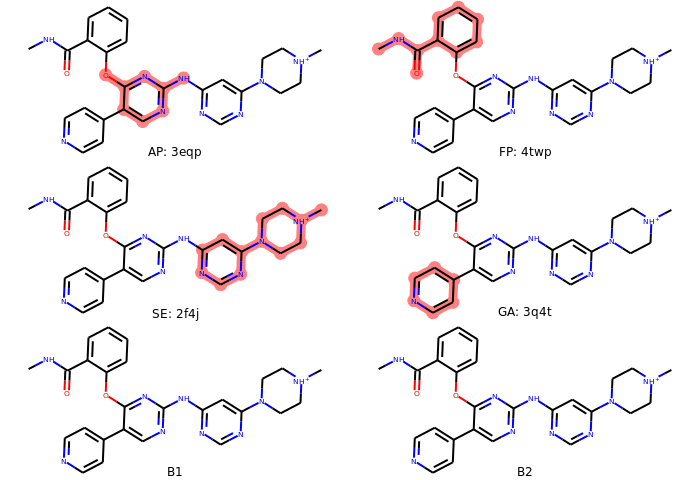

In [24]:
Draw.MolsToGridImage([mol, mol, mol, mol, mol, mol], 
                     highlightAtomLists=highlightAtomLists, legends=legends, molsPerRow=2, subImgSize=(350, 160))

In [25]:
# highlightAtomLists = list(highlightAtomLists[i] for i in [0,2,3,4])
# legends = list(legends[i] for i in [0,2,3,4])
# Draw.MolsToGridImage([mol, mol, mol, mol], 
#                      highlightAtomLists=highlightAtomLists, legends=legends, molsPerRow=2, subImgSize=(350, 160))